In [1]:
import cv2    
from cv2 import dnn
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
import os

In [2]:
prototxt = 'models/deploy.prototxt.txt'    
caffemodel='models/res10_300x300_ssd_iter_140000.caffemodel'     
ssd_net =  dnn.readNetFromCaffe( prototxt, caffemodel)  

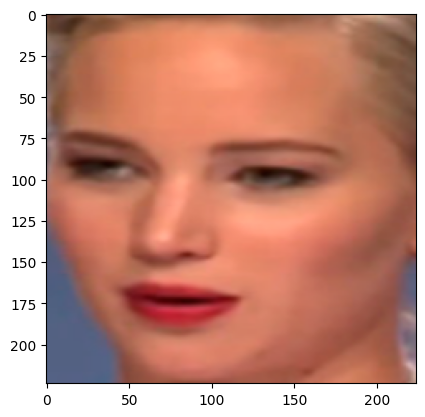

In [4]:
image = cv2.imread('test/real1.png')
# print(image.shape)

# Resize the image to a fixed size (300x300) for input to the SSD model
resized_image = cv2.resize(image, (300, 300))

# Convert the image to a blob
blob = cv2.dnn.blobFromImage(resized_image, 1.0, (300, 300), (104.0, 177.0, 123.0))

# Set the input to the network
ssd_net.setInput(blob)

# Forward pass through the network to detect faces
detections = ssd_net.forward()
# print(detections)
# Loop over the detections
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    # If confidence is above a certain threshold, consider it as a face
    if confidence > 0.5:
        # Get the coordinates of the bounding box
        box = detections[0, 0, i, 3:7] * [image.shape[1], image.shape[0], image.shape[1], image.shape[0]] 
        (startX, startY, endX, endY) = box.astype("int")

        # Crop the face from the image
        face = image[startY:endY, startX:endX]

        # Resize the face to the final size (224x224)
        face_resized = cv2.resize(face, (224, 224), interpolation=cv2.INTER_CUBIC)

        # Display the face
        plt.imshow(cv2.cvtColor(face_resized, cv2.COLOR_BGR2RGB))
        cv2.imwrite('test/real1_ssd.png', face_resized)


1/1 [==============================] - 0s 226ms/step


True

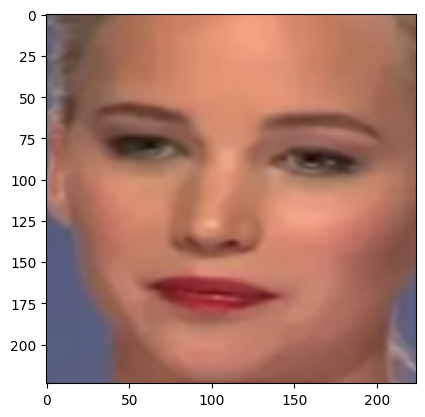

In [33]:
def extract_face(frame):
    detector = MTCNN()
    faces = detector.detect_faces(frame)
    if faces:
        x, y, w, h = faces[0]['box']
        face = frame[y:y + h, x:x + w]
        return cv2.resize(face, (224, 224))
    else:
        return None

frame = cv2.imread('test/real4.png')
face = extract_face(frame)
plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
cv2.imwrite('test/real4_mtcnn.png', face)